In [12]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import accuracy_score
from time import time

In [2]:
classifiersNames = [
    "MLP classifier :",
    "K Nearest Neighbour Classifier :",
    "SVC :",
    "DecisionTreeClassifier :",
    "RandomForestClassifier :",
    "AdaBoostClassifier :",
    "GaussianNB :"
]

classifiers = [
    MLPClassifier(),
    KNeighborsClassifier(),
    SVC(),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    AdaBoostClassifier(),
    GaussianNB()
]

In [3]:
# Training data
t0 = time()
train_data = pd.read_csv("train.csv").as_matrix()
xtrain = train_data[0:21000, 1:]
train_label = train_data[0:21000, 0]

# Testing data
test_data = pd.read_csv("test.csv").as_matrix()
xtest = train_data[21000:, 1:]
actual_label = train_data[21000:, 0]
print ("Time taken to split data into training and testing data : " + str(time() - t0) + " s")

Time taken to split data into training and testing data : 9.21900010109 s


In [4]:
acc_scores = []
train_times = []
pred_times = []

In [5]:
for clf in classifiers:
    
    print (classifiersNames[classifiers.index(clf)])
       
    t0 = time()
    clf.fit(xtrain, train_label)
    train_time = time() - t0
    train_times.append(train_time)
    print ("\tTime Taken to train model : " + str(train_time) + " s")

    # index = 85
    # d = xtest[index]
    # d.shape = (28, 28)
    # pt.imshow(255 - d, cmap='gray')
    # print(clf.predict([xtest[index]]))
    # pt.show()

    t0 = time()
    pred_label = clf.predict(xtest)
    pred_time = time() - t0
    pred_times.append(pred_time)
    print ("\tTime Taken to predict from model : " + str(pred_time) + " s")
    
    score = accuracy_score(actual_label, pred_label)
    score = score * 100
    print("\tAccuracy : " + str(score) + " %")
    acc_scores.append(score)

MLP classifier :
	Time Taken to train model : 29.8009998798 s
	Time Taken to predict from model : 0.351999998093 s
	Accuracy : 93.55238095238096 %
K Nearest Neighbour Classifier :
	Time Taken to train model : 3.01999998093 s
	Time Taken to predict from model : 782.357000113 s
	Accuracy : 95.95238095238095 %
SVC :
	Time Taken to train model : 915.953999996 s
	Time Taken to predict from model : 447.877000093 s
	Accuracy : 11.00952380952381 %
DecisionTreeClassifier :
	Time Taken to train model : 7.69799995422 s
	Time Taken to predict from model : 0.0889999866486 s
	Accuracy : 83.57619047619048 %
RandomForestClassifier :
	Time Taken to train model : 1.81799983978 s
	Time Taken to predict from model : 0.177000045776 s
	Accuracy : 92.93809523809524 %
AdaBoostClassifier :
	Time Taken to train model : 20.4769999981 s
	Time Taken to predict from model : 2.02399992943 s
	Accuracy : 69.44285714285714 %
GaussianNB :
	Time Taken to train model : 0.616999864578 s
	Time Taken to predict from model : 

In [6]:
acc_scores

[93.55238095238096,
 95.95238095238095,
 11.00952380952381,
 83.57619047619048,
 92.93809523809524,
 69.44285714285714,
 55.99047619047619]

In [14]:
def generate_plot(title, ticks, dataset, color_number):
    colors = ["slateblue", "mediumseagreen", "tomato"]
    plt.figure(figsize=(8, 6))
    
    ax = plt.subplot()    
    ax.spines["top"].set_visible(False)   
    ax.spines["bottom"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax.spines["left"].set_visible(False)
    
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left() 
    
    plt.xticks(np.arange(len(ticks)), ticks, fontsize=10, rotation=50)
    plt.title(title, fontsize = 22)
    plt.bar(ticks, dataset, linewidth=1.2, color=colors[color_number])

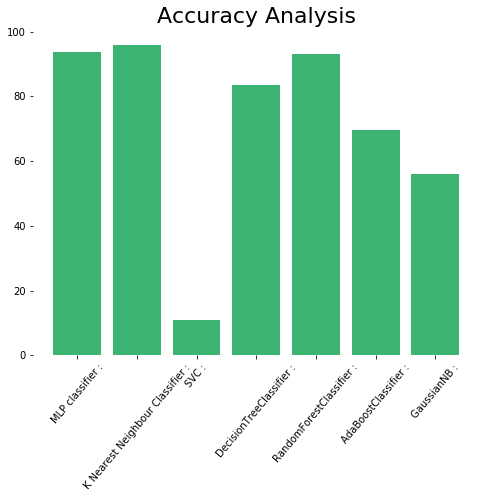

In [15]:
generate_plot("Accuracy Analysis", classifiersNames, acc_scores, 1)

In [16]:
train_times

[29.800999879837036,
 3.0199999809265137,
 915.9539999961853,
 7.697999954223633,
 1.8179998397827148,
 20.47699999809265,
 0.6169998645782471]

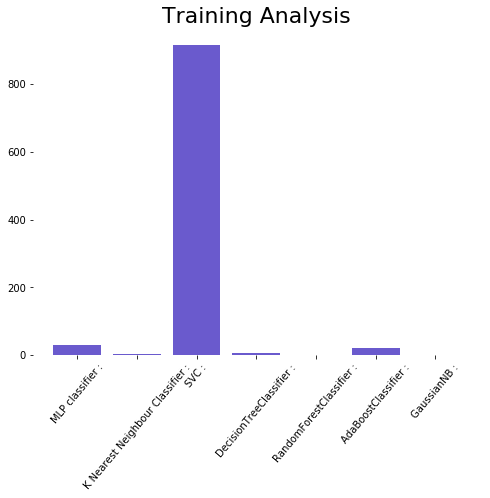

In [17]:
generate_plot("Training Analysis", classifiersNames, train_times, 0)

In [18]:
pred_times

[0.35199999809265137,
 782.3570001125336,
 447.8770000934601,
 0.08899998664855957,
 0.1770000457763672,
 2.0239999294281006,
 2.9019999504089355]

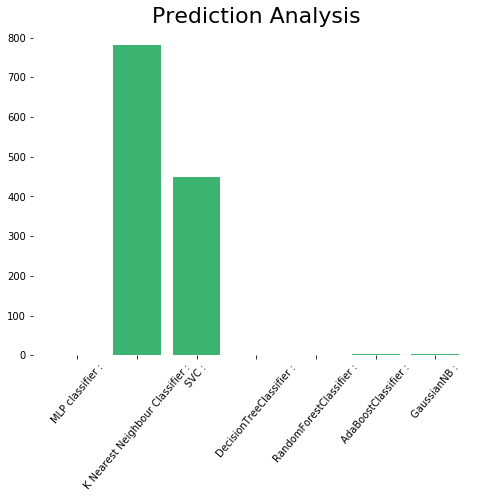

In [19]:
generate_plot("Prediction Analysis", classifiersNames, pred_times, 1)